In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
cancer_cols = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

my_frame = pd.read_csv('breast-cancer.csv', names = cancer_cols)
my_frame.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
my_frame.shape

(286, 10)

In [5]:
my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [6]:
my_frame.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [8]:
my_frame.dtypes

Class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [9]:
my_frame.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

<AxesSubplot:>

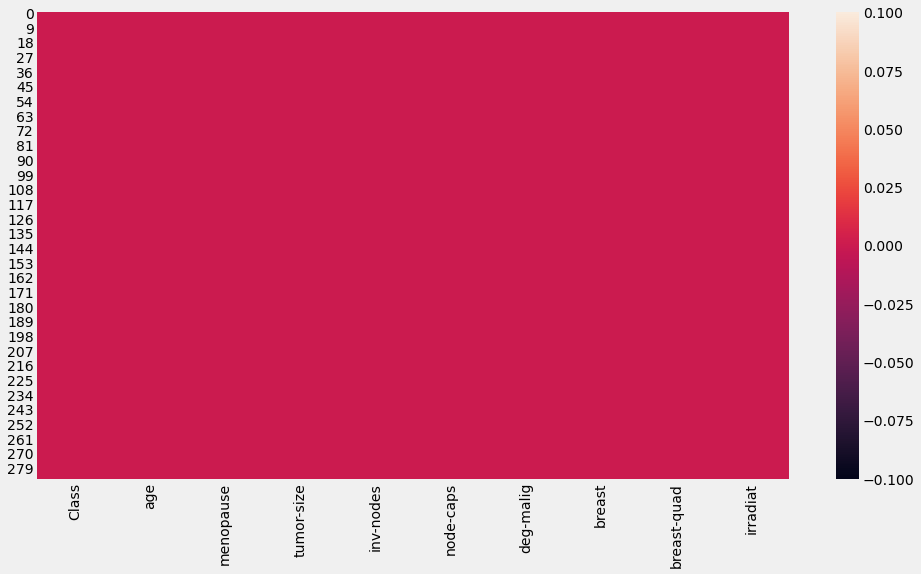

In [13]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize = (15, 8))
sns.heatmap(my_frame.isnull(), cbar = True)

In [14]:
my_frame.columns

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [15]:
numeric_data = my_frame['deg-malig']
numeric_data.head()

0    3
1    2
2    2
3    2
4    2
Name: deg-malig, dtype: int64

In [28]:
encode_non_numeric = pd.get_dummies(my_frame, columns = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'])
encode_non_numeric.head()

,deg-malig,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,2,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,2,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [29]:
all_data = pd.concat([numeric_data, encode_non_numeric], axis = 1)
all_data.head()

,deg-malig,deg-malig,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,3,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,2,2,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,2,2,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,2,2,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2,2,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [30]:
all_data.dtypes

deg-malig                     int64
deg-malig                     int64
Class_no-recurrence-events    uint8
Class_recurrence-events       uint8
age_20-29                     uint8
age_30-39                     uint8
age_40-49                     uint8
age_50-59                     uint8
age_60-69                     uint8
age_70-79                     uint8
menopause_ge40                uint8
menopause_lt40                uint8
menopause_premeno             uint8
tumor-size_0-4                uint8
tumor-size_10-14              uint8
tumor-size_15-19              uint8
tumor-size_20-24              uint8
tumor-size_25-29              uint8
tumor-size_30-34              uint8
tumor-size_35-39              uint8
tumor-size_40-44              uint8
tumor-size_45-49              uint8
tumor-size_5-9                uint8
tumor-size_50-54              uint8
inv-nodes_0-2                 uint8
inv-nodes_12-14               uint8
inv-nodes_15-17               uint8
inv-nodes_24-26             

## train test split

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
x = all_data.drop(['irradiat_no', 'irradiat_yes'], axis = 1)
y = all_data['irradiat_yes']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [42]:
x_test.head()

,deg-malig,deg-malig,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,...,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
265,3,3,0,1,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
107,2,2,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
20,2,2,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
32,3,3,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
214,2,2,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


In [43]:
y_test.head()

265    0
107    0
20     0
32     0
214    0
Name: irradiat_yes, dtype: uint8

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [44]:
lR_model = LogisticRegression()

In [45]:
lR_model.fit(x_train, y_train)

LogisticRegression()

In [46]:
lR_y_pred = lR_model.predict(x_test)

In [49]:
print(classification_report(y_test, lR_y_pred))
print(confusion_matrix(y_test, lR_y_pred))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lR_y_pred) * 100)

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        43
           1       0.60      0.20      0.30        15

    accuracy                           0.76        58
   macro avg       0.69      0.58      0.58        58
weighted avg       0.73      0.76      0.71        58

[[41  2]
 [12  3]]

Logistic Regression Accuracy: 75.86206896551724


## SVM

In [50]:
from sklearn.svm import SVC

In [51]:
svc_model = SVC(kernel = 'linear')

In [52]:
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [53]:
svc_y_pred = svc_model.predict(x_test)

In [54]:
print(classification_report(y_test, svc_y_pred))
print(confusion_matrix(y_test, svc_y_pred))
print("\nSVM Accuracy:", accuracy_score(y_test, svc_y_pred) * 100)

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        43
           1       0.75      0.20      0.32        15

    accuracy                           0.78        58
   macro avg       0.76      0.59      0.59        58
weighted avg       0.77      0.78      0.72        58

[[42  1]
 [12  3]]

SVM Accuracy: 77.58620689655173


## Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb_model = GaussianNB()

In [57]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [58]:
nb_y_pred = nb_model.predict(x_test)

In [59]:
print(classification_report(y_test, nb_y_pred))
print(confusion_matrix(y_test, nb_y_pred))
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_y_pred) * 100)

              precision    recall  f1-score   support

           0       0.86      0.58      0.69        43
           1       0.38      0.73      0.50        15

    accuracy                           0.62        58
   macro avg       0.62      0.66      0.60        58
weighted avg       0.74      0.62      0.64        58

[[25 18]
 [ 4 11]]

Naive Bayes Accuracy: 62.06896551724138


## KNearest Neighbor

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn_model = KNeighborsClassifier(n_neighbors = 2)

In [66]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [67]:
knn_y_pred = knn_model.predict(x_test)

In [68]:
print(classification_report(y_test, knn_y_pred))
print(confusion_matrix(y_test, knn_y_pred))
print("\nKNN Accuracy:", accuracy_score(y_test, knn_y_pred) * 100)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        43
           1       1.00      0.07      0.12        15

    accuracy                           0.76        58
   macro avg       0.88      0.53      0.49        58
weighted avg       0.82      0.76      0.67        58

[[43  0]
 [14  1]]

KNN Accuracy: 75.86206896551724


## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt_model = DecisionTreeClassifier()

In [71]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
dt_y_pred = dt_model.predict(x_test)

In [73]:
print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_y_pred) * 100)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        43
           1       0.31      0.33      0.32        15

    accuracy                           0.64        58
   macro avg       0.54      0.54      0.54        58
weighted avg       0.65      0.64      0.64        58

[[32 11]
 [10  5]]

Decision Tree Accuracy: 63.793103448275865


## Average Accuracy

In [74]:
avg_predict = (lR_y_pred + svc_y_pred + nb_y_pred + knn_y_pred + dt_y_pred) // 5
predict_accuracy = accuracy_score(y_test, avg_predict)
print("Average Prediction of Models:", predict_accuracy * 100)

Average Prediction of Models: 75.86206896551724


## Apply bagging boosting

In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss

In [76]:
voting_classifier = VotingClassifier(estimators = [('LR', lR_model), ('SVC', svc_model), ('NB', nb_model), ('KNN', knn_model), ('DTree', dt_model)], voting = 'hard')

In [77]:
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('SVC', SVC(kernel='linear')),
                             ('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier(n_neighbors=2)),
                             ('DTree', DecisionTreeClassifier())])

In [78]:
voting_y_pred = voting_classifier.predict(x_test)

## Apply KFold

In [79]:
from sklearn.model_selection import KFold, cross_val_score

In [80]:
svm_bagging_model = BaggingClassifier(base_estimator = svc_model, n_estimators = 40, random_state = 14)
dtree_bagging_model = BaggingClassifier(base_estimator = dt_model, n_estimators = 40, random_state = 14)
knn_bagging_model = BaggingClassifier(base_estimator = knn_model, n_estimators = 40, random_state = 14)

In [81]:
def bagging_ensemble(my_model):
    k_folds = KFold(n_splits = 20, random_state = 14, shuffle = True)
    results = cross_val_score(my_model, x_train, y_train, cv = k_folds)
    print('Results:', results.mean())

In [82]:
bagging_ensemble(svm_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(knn_bagging_model)

Results: 0.7893939393939393
Results: 0.8128787878787879
Results: 0.7454545454545455


## Apply KFold on number estimators

In [83]:
k_folds = KFold(n_splits = 20, random_state = 14, shuffle = True)
n_estimators = [20, 40, 60, 80, 100]

for i in n_estimators:
    ada_boost = AdaBoostClassifier(n_estimators = i, random_state = 14)
    results = cross_val_score(ada_boost, x_train, y_train, cv = k_folds)
    print('Results for {} estimators:'.format(i))
    print(results.mean())

Results for 20 estimators:
0.7492424242424243
Results for 40 estimators:
0.7534090909090907
Results for 60 estimators:
0.7712121212121211
Results for 80 estimators:
0.7624999999999998
Results for 100 estimators:
0.7624999999999998
